https://chatgpt.com/share/67c06a20-77e0-8000-9047-850623ef2ab2

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from tqdm import tqdm

%matplotlib inline
%config InlineBackend.figure_format='retina'
#!pip install git+https://github.com/M-Bianchi/My_matplotlib_style
plt.style.use('mystyle')
plt.rcParams['axes.grid'] = False

We want to estimate the mean height of Americans from a sample of 1000 people, associating an uncertainty to it. 

Let us assumes that the true heights $\mu_i$ are distributed according to a Gaussian distribution with mean $\mu_\text{heights} = 1.7m$ and standard deviation $\sigma_\text{heights} = 0.3m$.

Each measurement is performed with a ruler whose measures are distributed as a Gaussian with standard deviation equal to $\sigma_\text{measure}=0.1m$. 

In [2]:
N_experiments = 100000
N_samples = 1000

mu_heights = 1.7
sigma_heights = 0.3
sigma_measure = 0.1

mean_experiments = np.zeros(N_experiments)

for i in tqdm(range(N_experiments)):
    mu_array = np.random.normal(loc=mu_heights, scale=sigma_heights, size=N_samples)
    x_array = np.random.normal(loc=mu_array, scale=sigma_measure)
    mean_experiments[i] = np.mean(x_array)

100%|██████████| 100000/100000 [00:03<00:00, 25634.66it/s]


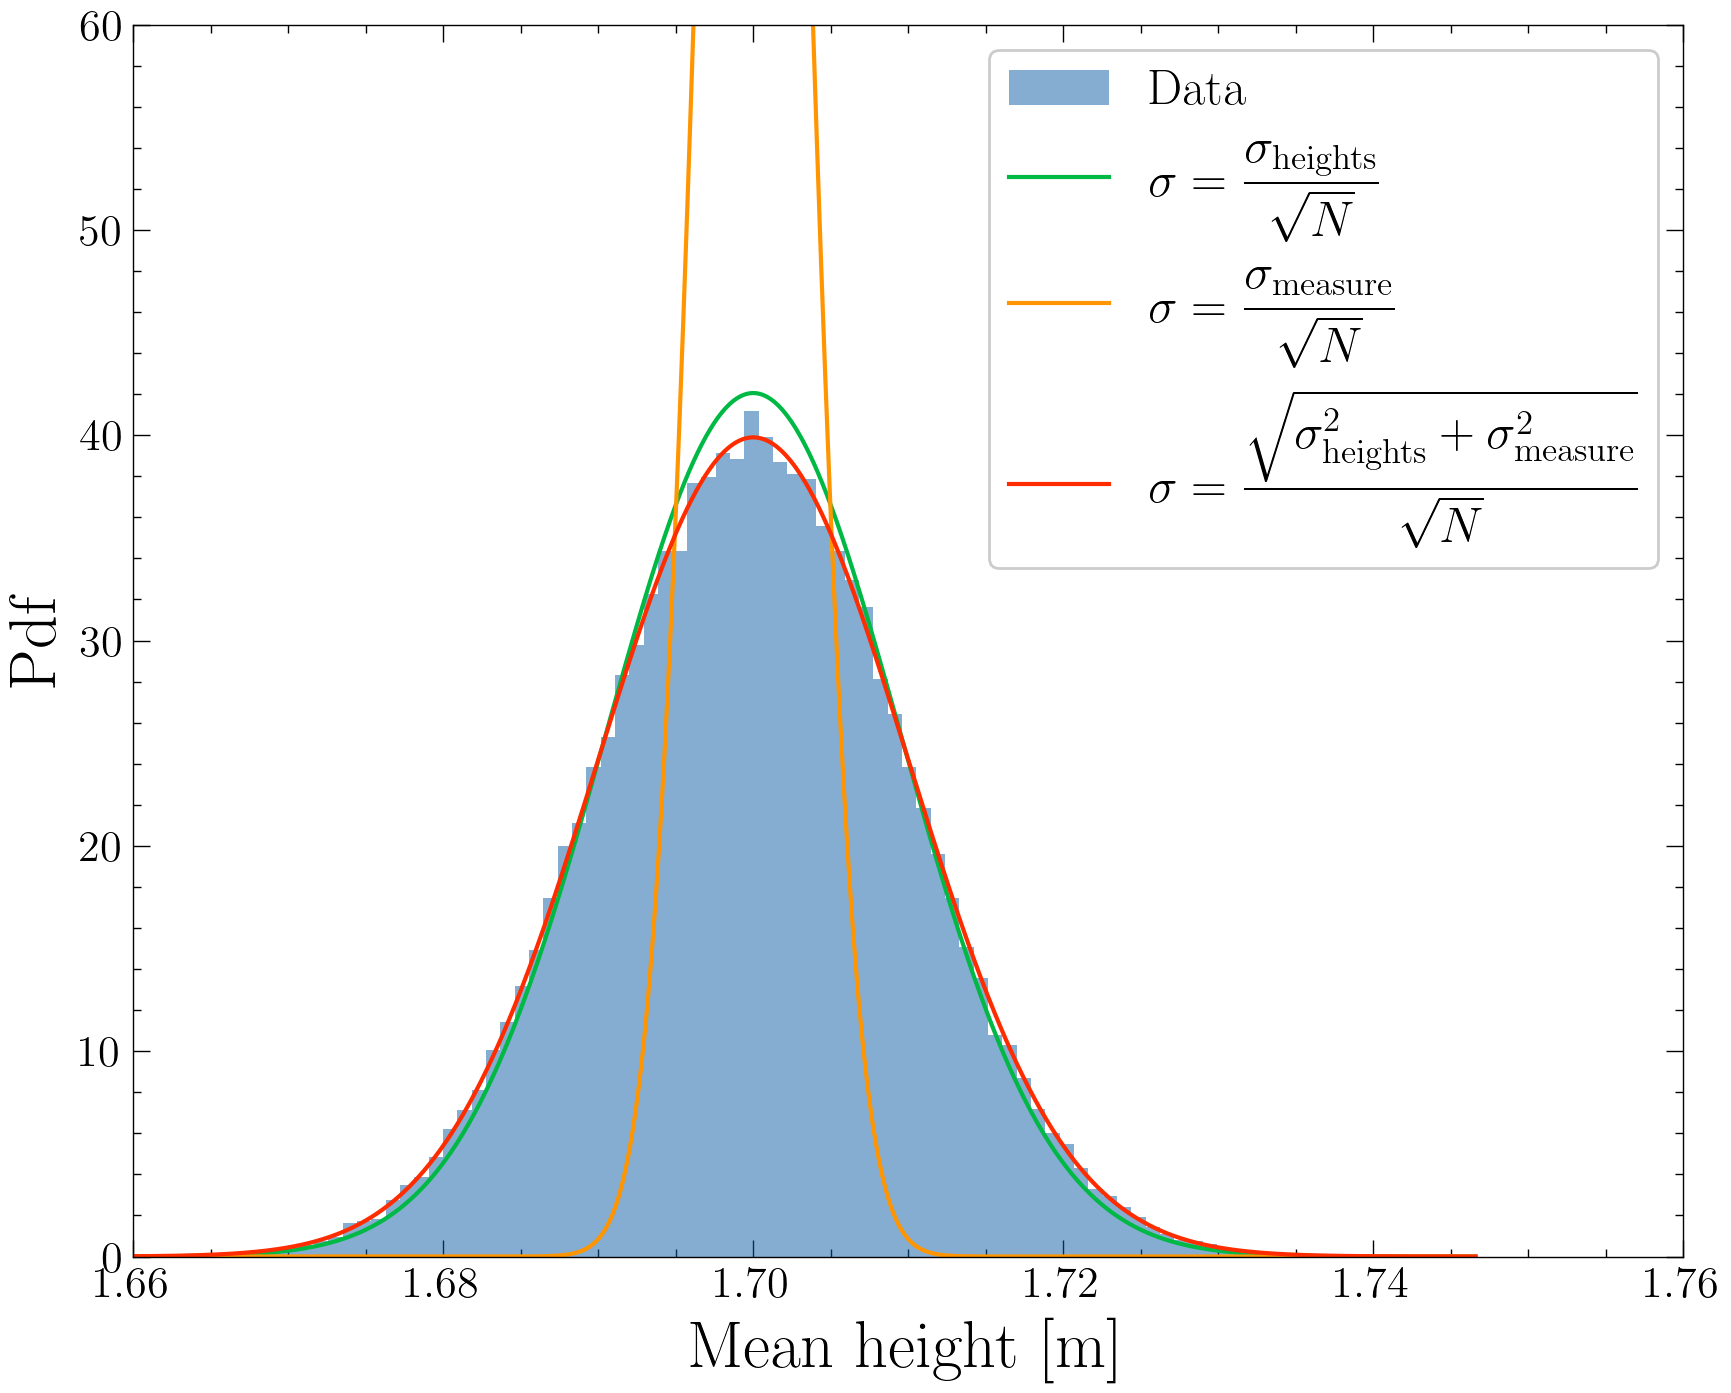

In [3]:
plt.hist(mean_experiments, bins=100, density=True, alpha=0.5, histtype='stepfilled', label='Data')

x_dense = np.linspace(np.min(mean_experiments), np.max(mean_experiments), 1000)

sigma_theory_1 = sigma_heights/np.sqrt(N_samples)
plt.plot(x_dense, stats.norm.pdf(x_dense, loc=mu_heights, scale=sigma_theory_1), label='$\sigma = \dfrac{\sigma_\\text{heights}}{\sqrt{N}}$')

sigma_theory_2 = sigma_measure/np.sqrt(N_samples)
plt.plot(x_dense, stats.norm.pdf(x_dense, loc=mu_heights, scale=sigma_theory_2), label='$\sigma = \dfrac{\sigma_\\text{measure}}{\sqrt{N}}$')

sigma_theory_3 = np.sqrt(sigma_heights**2 + sigma_measure**2)/np.sqrt(N_samples)
plt.plot(x_dense, stats.norm.pdf(x_dense, loc=mu_heights, scale=sigma_theory_3), label='$\sigma = \dfrac{\sqrt{\sigma_\\text{heights}^2 + \sigma_\\text{measure}^2}}{\sqrt{N}}$')

plt.xlim(1.66, 1.76)
plt.ylim(0, 60)

plt.xlabel('Mean height [m]')
plt.ylabel('Pdf')
plt.legend();